Copied from the well github example!


In [2]:
import glob

import h5py
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# print the list of paths of files in the test set
set_path = "test"
paths = sorted(glob.glob(f"path/to/base/datasets/planetswe/data/{set_path}/*.hdf5"))
print(paths)

['path/to/base/datasets/planetswe/data/test/planetswe_IC37_s1.hdf5', 'path/to/base/datasets/planetswe/data/test/planetswe_IC37_s2.hdf5', 'path/to/base/datasets/planetswe/data/test/planetswe_IC37_s3.hdf5', 'path/to/base/datasets/planetswe/data/test/planetswe_IC38_s3.hdf5', 'path/to/base/datasets/planetswe/data/test/planetswe_IC39_s1.hdf5', 'path/to/base/datasets/planetswe/data/test/planetswe_IC39_s2.hdf5']


In [4]:
# select the first path (arbitrary choice)
p = paths[3]

# print the first layer of keys
with h5py.File(p, "r") as f:
    print(f["dimensions"].keys())
# This dataset is in angular coordinates, so the dimensions are phi and theta.

<KeysViewHDF5 ['phi', 'theta', 'time']>


In [5]:
# In 'boundary_conditions' is stored the information about the boundary conditions:
with h5py.File(p, "r") as f:
    print("print bc available:", f["boundary_conditions"].keys())
    print("print attributes of the bc:",f["boundary_conditions"]["phi_periodic"].attrs["associated_dims"])
    print("get the bc type:", f["boundary_conditions"]["theta_open"].attrs["bc_type"])

print bc available: <KeysViewHDF5 ['phi_periodic', 'theta_open']>
print attributes of the bc: ['phi']
get the bc type: OPEN


In [6]:
with h5py.File(p, "r") as f:
    print("t0_fields:", f["dimensions"].keys())

t0_fields: <KeysViewHDF5 ['phi', 'theta', 'time']>


In [7]:
# Reminder: 't0_fields', 't1_fields', 't2_fields' are respectively scalar fields, vector fields and tensor fields
# print the different fields available in the dataset
with h5py.File(p, "r") as f:
    print("t0_fields:", f["t0_fields"].keys())
    print("t1_fields:", f["t1_fields"].keys())
    print("t2_fields:", f["t2_fields"].keys())

t0_fields: <KeysViewHDF5 ['height']>
t1_fields: <KeysViewHDF5 ['velocity']>
t2_fields: <KeysViewHDF5 []>


In [12]:
# The data is of shape (n_trajectories, n_timesteps, x, y)
# Get the first t0_field and save it as a numpy array
with h5py.File(p, "r") as f:
    velocity = f["t1_fields"]["velocity"][:]  # HDF5 datasets can be sliced like a numpy array
    print("shape of velocity t1_field: ", velocity.shape)
    height = f["t0_fields"]["height"][:]
    print("shape of height t0_field ", height.shape)

    # you can directly slice the selected field without reading the whole dataset by doing:
    # traj = 0 #select the trajectory
    # field = f['t0_fields']['concentration'][traj, :]

shape of velocity t1_field:  (1, 1008, 256, 512, 2)
shape of height t0_field  (1, 1008, 256, 512)


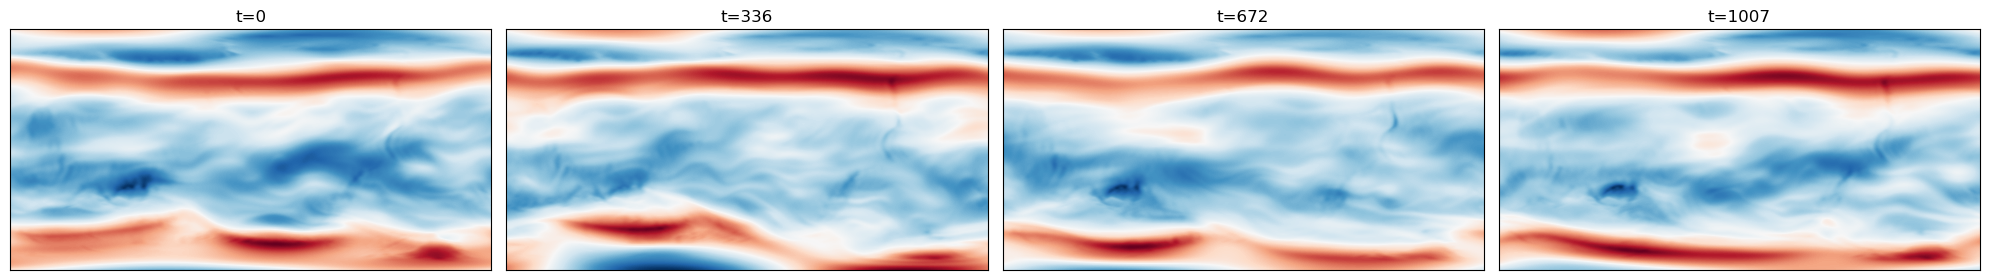

In [16]:
traj = 0  # select the trajectory (it seems like all files only have the 0 trajectory) might be more if we concatinate files...
direction = 1 # the flow is a 2d vector for the velocity fields.. choose one of them 
traj_toplot = velocity[traj, :, :, :, direction]
# traj_toplot = height[traj, :, :, :]
# field is now of shape (n_timesteps, x, y). Let's do a subplot to plot it at t= 0, t= T/3, t= 2T/3 and t= T:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
T = traj_toplot.shape[0]

# same colorbar for all subplots:
normalize_plots = False
cmap = "RdBu_r"

if normalize_plots:
    vmin = np.nanmin(traj_toplot)
    vmax = np.nanmax(traj_toplot)
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    for i, t in enumerate([0, T // 3, (2 * T) // 3, T - 1]):
        axs[i].imshow(traj_toplot[t], cmap=cmap, norm=norm)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(f"t={t}")
else:
    for i, t in enumerate([0, T // 3, (2 * T) // 3, T - 1]):
        axs[i].imshow(traj_toplot[t], cmap=cmap)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(f"t={t}")
plt.tight_layout()
plt.savefig(f"images/evolution_of_flow_velocity_direction{direction}.pdf",bbox_inches="tight", dpi=600)

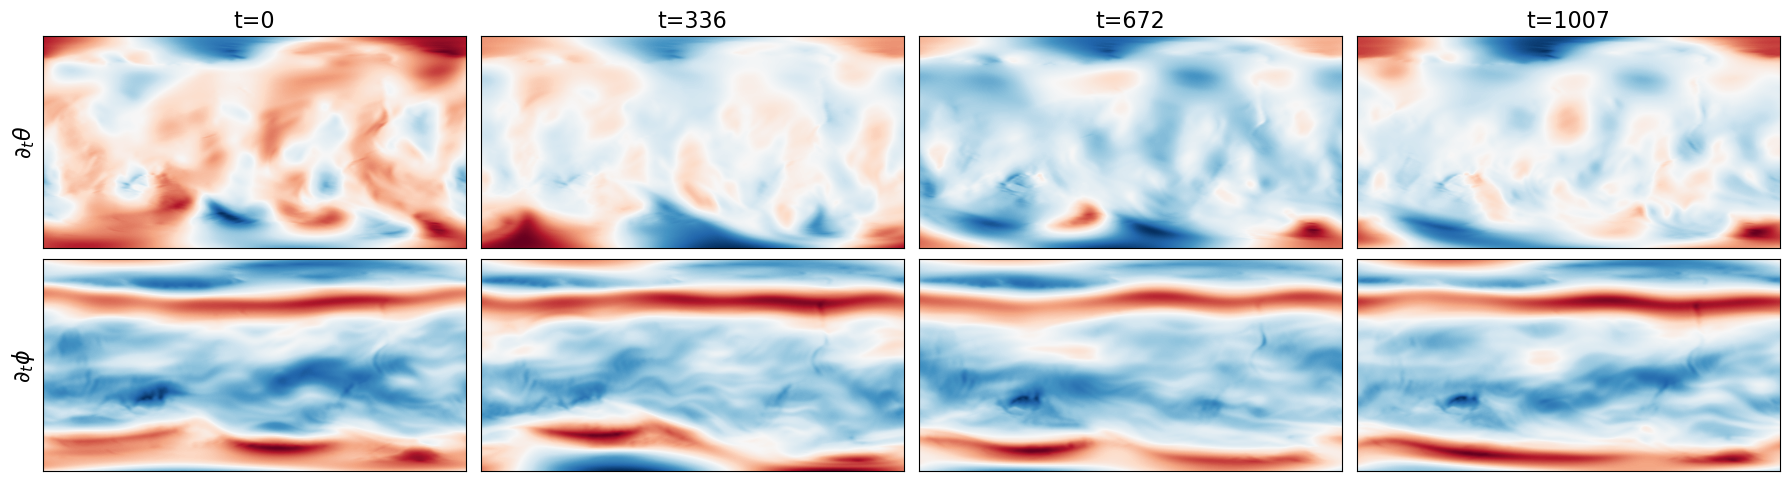

In [28]:
traj = 0  # select the trajectory (it seems like all files only have the 0 trajectory) might be more if we concatinate files...
directions = [0,1] # the flow is a 2d vector for the velocity fields.. choose one of them 
traj_toplot = velocity[traj, :, :, :, :]
# traj_toplot = height[traj, :, :, :]
# field is now of shape (n_timesteps, x, y). Let's do a subplot to plot it at t= 0, t= T/3, t= 2T/3 and t= T:
fig, axs = plt.subplots(2, 4, figsize=(18, 5))
T = traj_toplot.shape[0]

# same colorbar for all subplots:
normalize_plots = False
cmap = "RdBu_r"
for direction in directions:
    for i, t in enumerate([0, T // 3, (2 * T) // 3, T - 1]):
        axs[direction, i].imshow(traj_toplot[t, :, :, direction], cmap=cmap)
        axs[direction, i].set_xticks([])
        axs[direction, i].set_yticks([])
        if direction==0:
            axs[direction, i].set_title(f"t={t}", fontsize=16)
        if i==0:
            if direction == 0:
                axs[direction, i].set_ylabel(r"$\partial_t \theta$", fontsize=16)
            else: 
                axs[direction, i].set_ylabel(r"$\partial_t \phi$", fontsize=16) 
plt.tight_layout()
plt.savefig(f"images/evolution_of_flow_velocities.pdf",bbox_inches="tight", dpi=600)